# 2 ライブラリとデータの作成

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(1)

In [2]:
x = np.random.normal(5, 1, 100)
t = 3*x+ 2 + np.random.normal(0, 1, 100)
# x = (x - x.mean())/x.std()
# t = (t - t.mean())/t.std()

In [3]:
x_train, x_test, t_train, t_test = train_test_split(x, t)
print(x_train.shape, x_test.shape, t_train.shape, t_test.shape)

(75,) (25,) (75,) (25,)


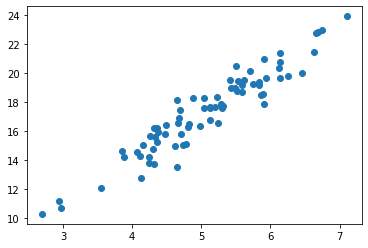

In [4]:
plt.scatter(x_train,t_train)

# 3 モデル

In [5]:
class Optimizer:
    def step(self, lr):
        self.w -= lr * self.dw
        self.b -= lr * self.db
        
class Linear(Optimizer):
    def __init__(self):
        self.w = np.random.randn(1)
        self.b = np.random.randn(1)
    def forward(self,x):
        self.x = x
        self.y = self.w*x + self.b
        return self.y
    def backward(self, dy):
        self.dw = np.dot(dy, self.x)
        self.db = dy.sum()
        
class Loss:
    def forward(self, y, t):
        self.y = y
        self.t = t
        L = sum((y-t)**2)/len(t)
        return L
    def backward(self):
        dy = 2*(self.y - self.t) / len(self.t)
        return dy

In [6]:
model_ob = Linear()
loss_ob = Loss()
def model(x):
    y = model_ob.forward(x)
    return y
def loss(y,t):
    L = loss_ob.forward(y,t)
    return L
def backward():
    dy = loss_ob.backward()
    model_ob.backward(dy)
def optimizer(lr):
    model_ob.step(lr)

# 4 モデルの学習

In [7]:
batch_size = 10
batch_n = len(x_train) // batch_size
batch_index = np.arange(len(x_train))

loss_train_all = []
loss_test_all = []

for epoch in range(1, 100 + 1):
    
    np.random.shuffle(batch_index)
    
    for n in range(batch_n):
        
        mb_index = batch_index[n*batch_size:(n+1)*batch_size]
        y = model(x_train[mb_index])
        loss_train = loss(y,t_train[mb_index])
        backward()
        optimizer(1e-3)
    
    y_train = model(x_train)
    loss_train = loss(y_train ,t_train)
    y_test = model(x_test)
    loss_test = loss(y_test ,t_test)
    
    loss_train_all.append(loss_train)
    loss_test_all.append(loss_test)
    
    if epoch == 1 or epoch % 20 == 0:
        print(f"Epoch {epoch}, loss_train {loss_train:.4f}, loss_test {loss_test:.4f}")

Epoch 1, loss_train 207.6295, loss_test 209.9308
Epoch 20, loss_train 0.8741, loss_test 0.9838
Epoch 40, loss_train 0.8730, loss_test 0.9674
Epoch 60, loss_train 0.8714, loss_test 0.9773
Epoch 80, loss_train 0.8704, loss_test 0.9709
Epoch 100, loss_train 0.8692, loss_test 0.9790


# 5 結果の可視化

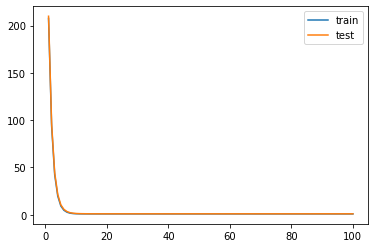

In [8]:
plt.plot(range(1,len(loss_train_all)+1), loss_train_all, label="train")
plt.plot(range(1,len(loss_test_all)+1), loss_test_all, label="test")
plt.legend()

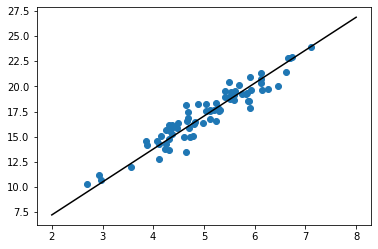

In [9]:
x = np.arange(2,9)
y = model(x)
plt.plot(x,y, color="black")
plt.scatter(x_train,t_train)